# Constants

In [1]:
artifact_folder = "..\\experiment(Jupyter)_artifacts"
dataset_folder_name = "built_dataset"
dataset_path =  "..\\dataset\\"
train_folder_name = "train"
test_folder_name = "test"

# Loading the libraries

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

# Building the paths

In [3]:
train_folder_path = os.path.join(dataset_path,train_folder_name)

In [4]:
test_folder_path = os.path.join(dataset_path,test_folder_name)

# Creating the dataset

In [5]:
train_files = os.listdir(train_folder_path)

In [6]:
with open(os.path.join(train_folder_path,train_files[0]),'r') as file_obj:
    file_content =  file_obj.readlines()

In [7]:
first_row = file_content[19]

In [8]:
count_white = first_row.count('')

In [9]:
first_row

'Time_taken (min)                    24.000000\n'

In [10]:
first_row.rsplit()

['Time_taken', '(min)', '24.000000']

In [11]:
{row.rsplit()[0]:row.rsplit()[-1] for row in file_content}

{'ID': '0x4607',
 'Delivery_person_ID': 'INDORES13DEL02',
 'Delivery_person_Age': '37.000000',
 'Delivery_person_Ratings': '4.900000',
 'Restaurant_latitude': '22.745049',
 'Restaurant_longitude': '75.892471',
 'Delivery_location_latitude': '22.765049',
 'Delivery_location_longitude': '75.912471',
 'Order_Date': '19-03-2022',
 'Time_Orderd': '11:30',
 'Time_Order_picked': '11:45',
 'Weather': 'Sunny',
 'Road_traffic_density': 'High',
 'Vehicle_condition': '2',
 'Type_of_order': 'Snack',
 'Type_of_vehicle': 'motorcycle',
 'multiple_deliveries': '0.000000',
 'Festival': 'No',
 'City': 'Urban',
 'Time_taken': '24.000000',
 'Name:': 'object'}

# Building the build dataset function

In [12]:
def build_dataset(path:str)->pd.DataFrame:
    try:
        dataset_array = []
        for index,file in enumerate(os.listdir(path)):
            #print(index,file)
            file_content = None
            with open(os.path.join(path,file),'r') as file_obj:
                
                file_content = file_obj.readlines()
            
            if file_content is not None:
                file_content_dict = {row.rsplit()[0]:row.rsplit()[-1] for row in file_content}
                dataset_array.append(file_content_dict)
        dataset = pd.DataFrame(dataset_array)
        return(dataset)
            
    except Exception as e:
        print(str(e))

In [13]:
train_data = build_dataset(path=train_folder_path)

In [14]:
train_data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken,Name:
0,0x4607,INDORES13DEL02,37.000000,4.900000,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30,...,Sunny,High,2,Snack,motorcycle,0.000000,No,Urban,24.000000,object
1,0xb379,BANGRES18DEL02,34.000000,4.500000,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45,...,Stormy,Jam,2,Snack,scooter,1.000000,No,Metropolitian,33.000000,object
2,0x5d6d,BANGRES19DEL01,23.000000,4.400000,12.914264,77.678400,12.924264,77.688400,19-03-2022,8:30,...,Sandstorms,Low,0,Drinks,motorcycle,1.000000,No,Urban,26.000000,object
3,0x7a6a,COIMBRES13DEL02,38.000000,4.700000,11.003669,76.976494,11.053669,77.026494,05-04-2022,17:60,...,Sunny,Medium,0,Buffet,motorcycle,1.000000,No,Metropolitian,21.000000,object
4,0x70a2,CHENRES12DEL01,32.000000,4.600000,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30,...,Cloudy,High,1,Snack,scooter,1.000000,No,Metropolitian,30.000000,object


In [15]:
test_data = build_dataset(path = test_folder_path)

In [16]:
test_data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Name:
0,0x2318,COIMBRES13DEL01,NaN,NaN,11.003669,76.976494,11.043669,77.016494,30-03-2022,NaN,15:05,NaN,NaN,3,Drinks,electric_scooter,1.000000,No,Metropolitian,object
1,0x3474,BANGRES15DEL01,28.000000,4.600000,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30,20:35,Windy,Jam,0,Snack,motorcycle,1.000000,No,Metropolitian,object
2,0x9420,JAPRES09DEL03,23.000000,4.500000,26.911378,75.789034,27.001378,75.879034,10-03-2022,19:35,19:45,Stormy,Jam,0,Drinks,motorcycle,1.000000,No,Metropolitian,object
3,0x72ee,JAPRES07DEL03,21.000000,4.800000,26.766536,75.837333,26.856536,75.927333,02-04-2022,17:15,17:20,Fog,Medium,1,Meal,scooter,1.000000,No,Metropolitian,object
4,0xa759,CHENRES19DEL01,31.000000,4.600000,12.986047,80.218114,13.096047,80.328114,27-03-2022,18:25,18:40,Sunny,Medium,2,Drinks,scooter,1.000000,No,Metropolitian,object


In [17]:
train_data.drop('Name:',axis = 1,inplace=True)

In [18]:
test_data.drop('Name:',axis = 1,inplace=True)

# Checking if all the delivery time is in minutes 

In [19]:
def check(path:str)->pd.DataFrame:
    try:
        check_array = []
        for index,file in enumerate(os.listdir(path)):
            #print(f"Working on file_no : {index} , name of the file : {file}")
            file_content = None
            with open(os.path.join(path,file),'r') as file_obj:
                file_content = file_obj.readlines()
            
            check_array.append(file_content[19])
        return check_array
            
    except Exception as e:
        print(str(e))

In [20]:
ch = check(train_folder_path)

In [21]:
ch = [row.rsplit()[1] for row in ch]

In [22]:
pd.Series(ch).unique()

array(['(min)'], dtype=object)

# All the datatime is in minutes

In [23]:
train_data

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken
0,0x4607,INDORES13DEL02,37.000000,4.900000,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30,11:45,Sunny,High,2,Snack,motorcycle,0.000000,No,Urban,24.000000
1,0xb379,BANGRES18DEL02,34.000000,4.500000,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45,19:50,Stormy,Jam,2,Snack,scooter,1.000000,No,Metropolitian,33.000000
2,0x5d6d,BANGRES19DEL01,23.000000,4.400000,12.914264,77.678400,12.924264,77.688400,19-03-2022,8:30,8:45,Sandstorms,Low,0,Drinks,motorcycle,1.000000,No,Urban,26.000000
3,0x7a6a,COIMBRES13DEL02,38.000000,4.700000,11.003669,76.976494,11.053669,77.026494,05-04-2022,17:60,18:10,Sunny,Medium,0,Buffet,motorcycle,1.000000,No,Metropolitian,21.000000
4,0x70a2,CHENRES12DEL01,32.000000,4.600000,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30,13:45,Cloudy,High,1,Snack,scooter,1.000000,No,Metropolitian,30.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30.000000,4.800000,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35,11:45,Windy,High,1,Meal,motorcycle,0.000000,No,Metropolitian,32.000000
45589,0xd641,AGRRES16DEL01,21.00,4.60,0.00,0.00,0.07,0.07,16-02-2022,19:55,20:10,Windy,Jam,0,Buffet,motorcycle,1.00,No,Metropolitian,36.00
45590,0x4f8d,CHENRES08DEL03,30.000000,4.900000,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50,24:05,Cloudy,Low,1,Drinks,scooter,0.000000,No,Metropolitian,16.000000
45591,0x5eee,COIMBRES11DEL01,20.000000,4.700000,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35,13:40,Cloudy,High,0,Snack,motorcycle,1.000000,No,Metropolitian,26.000000


# Creating Validation dataset

#### Will use Stratified Split

#### Visualizing Target Column

C:\Users\rachi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


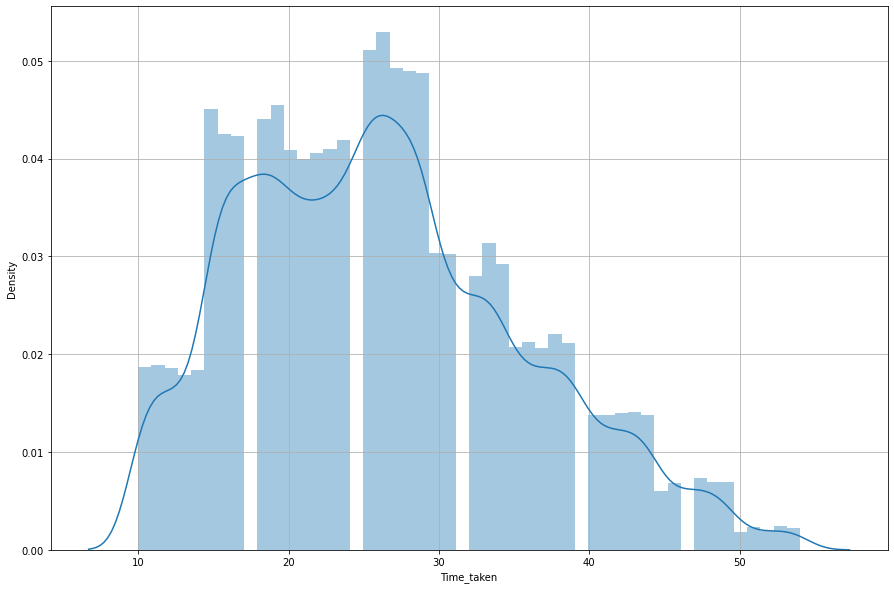

In [24]:
figure = plt.figure(figsize=(15,10))
sns.distplot(train_data['Time_taken'])
plt.grid()
plt.show()

In [25]:
train_data[train_data['Time_taken'].astype('float') < 10 ]

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken


In [26]:
train_data[train_data['Time_taken'].astype('float') > 50 ]

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken
43,0xb796,SURRES17DEL03,37.000000,4.700000,21.149569,72.772697,21.239569,72.862697,04-04-2022,19:45,19:50,Sandstorms,Jam,0,Snack,motorcycle,3.000000,No,Metropolitian,52.000000
188,0x4b5b,MYSRES04DEL03,38.000000,4.300000,12.308500,76.665808,12.398500,76.755808,04-04-2022,21:15,21:25,Sandstorms,Jam,0,Meal,motorcycle,1.000000,Yes,Semi-Urban,54.000000
266,0xd92f,AGRRES03DEL01,35.000000,4.900000,27.160832,78.011608,27.230832,78.081608,18-02-2022,21:15,21:30,Cloudy,Jam,0,Buffet,motorcycle,2.000000,No,Metropolitian,53.000000
641,0xc2ba,LUDHRES18DEL03,20.000000,3.900000,30.890184,75.829615,30.950184,75.889615,11-02-2022,20:40,20:45,Sunny,Jam,0,Buffet,motorcycle,1.000000,No,Metropolitian,54.000000
722,0x836d,HYDRES06DEL01,31.000000,4.400000,17.455894,78.375467,17.525894,78.445467,25-03-2022,19:35,19:40,Stormy,Jam,0,Meal,motorcycle,1.000000,Yes,Metropolitian,53.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45207,0x5ff8,MYSRES03DEL03,39.000000,4.100000,12.299524,76.642620,12.389524,76.732620,23-03-2022,20:55,21:05,Sandstorms,Jam,0,Drinks,motorcycle,3.000000,No,Metropolitian,51.000000
45231,0x5df8,HYDRES08DEL02,35.000000,4.900000,17.438263,78.397865,17.568263,78.527865,02-03-2022,20:35,20:40,Cloudy,Jam,0,Drinks,motorcycle,1.000000,No,Semi-Urban,51.000000
45294,0x713d,JAPRES07DEL02,39.000000,4.400000,26.766536,75.837333,26.896536,75.967333,18-03-2022,21:35,21:45,Sandstorms,Jam,0,Drinks,motorcycle,1.000000,No,Metropolitian,53.000000
45305,0x2271,SURRES19DEL01,35.000000,4.700000,21.149669,72.772629,21.219669,72.842629,23-03-2022,20:45,20:60,Cloudy,Jam,0,Meal,motorcycle,1.000000,No,Metropolitian,51.000000


In [27]:
train_data['Time_taken'].astype('float').max()

54.0

In [28]:
## There are no values lesser than 10, but to include 10, lets use 0 to 10 as well
## There are very less values greater than 50
## Let's do binning as 0 - 10, 10 - 20, 20 - 30 , 30 - 40 , 40 - 50 , 50 -infinity

In [29]:
train_data['time_taken_cat'] = pd.cut(train_data['Time_taken'].astype(float), bins= [0,10.0,20.0,30.0,40.0,50.0,np.inf] ,labels=[1,2,3,4,5,6])

<AxesSubplot:>

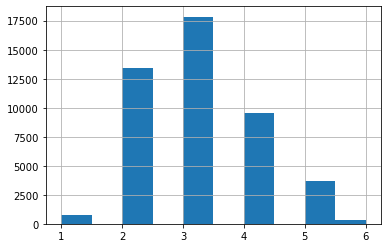

In [30]:
train_data['time_taken_cat'].hist()

##### Doing the stratified split

In [31]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)

In [32]:
for train_index, validation_index in split.split(train_data, train_data['time_taken_cat']):
    
    train_set = train_data.loc[train_index]
    validation_set = train_data.loc[validation_index]

### Checking the distribution

C:\Users\rachi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


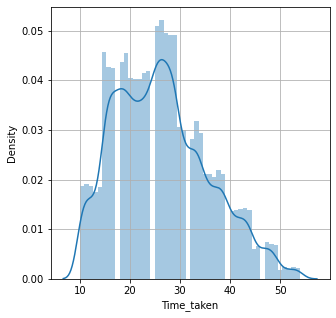

In [33]:
figure = plt.figure(figsize=(5,5))
sns.distplot(train_set['Time_taken'])
plt.grid()
plt.show()

<AxesSubplot:>

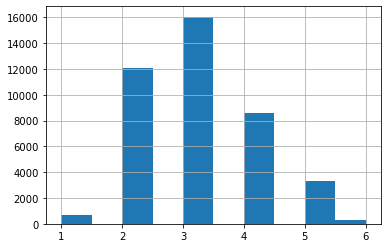

In [34]:
train_set['time_taken_cat'].hist()

C:\Users\rachi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


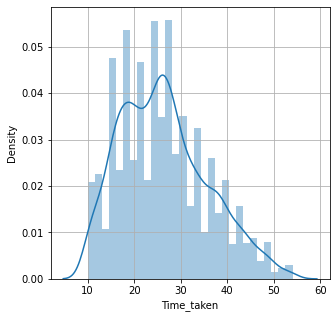

In [35]:
figure = plt.figure(figsize=(5,5))
sns.distplot(validation_set['Time_taken'])
plt.grid()
plt.show()

<AxesSubplot:>

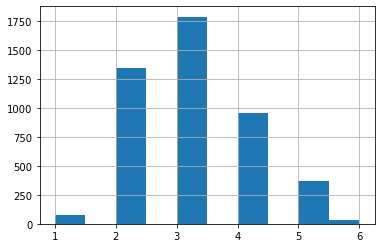

In [36]:
validation_set['time_taken_cat'].hist()

In [37]:
train_set.drop('time_taken_cat',axis = 1, inplace= True)
validation_set.drop('time_taken_cat',axis = 1 , inplace= True)

# Storing the created dataset

In [38]:
train_folder_path

'..\\dataset\\train'

In [39]:
test_folder_path

'..\\dataset\\test'

In [40]:
base_dataset_dir = artifact_folder

In [41]:
dataset_folder_name = "built_dataset"

In [42]:
train_dataset_path = os.path.join(base_dataset_dir,dataset_folder_name,"train.csv")

In [43]:
test_dataset_path = os.path.join(base_dataset_dir,dataset_folder_name,"test.csv")

In [44]:
validation_dataset_path = os.path.join(base_dataset_dir,dataset_folder_name,"validation.csv")

In [45]:
os.makedirs(os.path.join(base_dataset_dir,dataset_folder_name),exist_ok=True)

In [46]:
train_set.to_csv(train_dataset_path,index=False)

In [47]:
test_data.to_csv(test_dataset_path,index=False)

In [48]:
validation_set.to_csv(validation_dataset_path,index = False)